# KNN for Diabetes

## 0) Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1) Preprocessing data

### 1) Impute nA values

In [3]:
path = "/content/drive/MyDrive/HK242 - IS - lab/diabetes.csv"
dataset = pd.read_csv(path)

In [4]:
dataset.shape

(768, 9)

In [29]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
dataset.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [31]:
dataset.describe(include = 'all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Replace 0 with nA value to process them later**

In [5]:
dataset_copy = dataset.copy(deep = True)
dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

**Show the number of nA values after replacing all the 0 values**

In [6]:
print(dataset_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


**Plot histograms of data to choose how to impute the nA values**

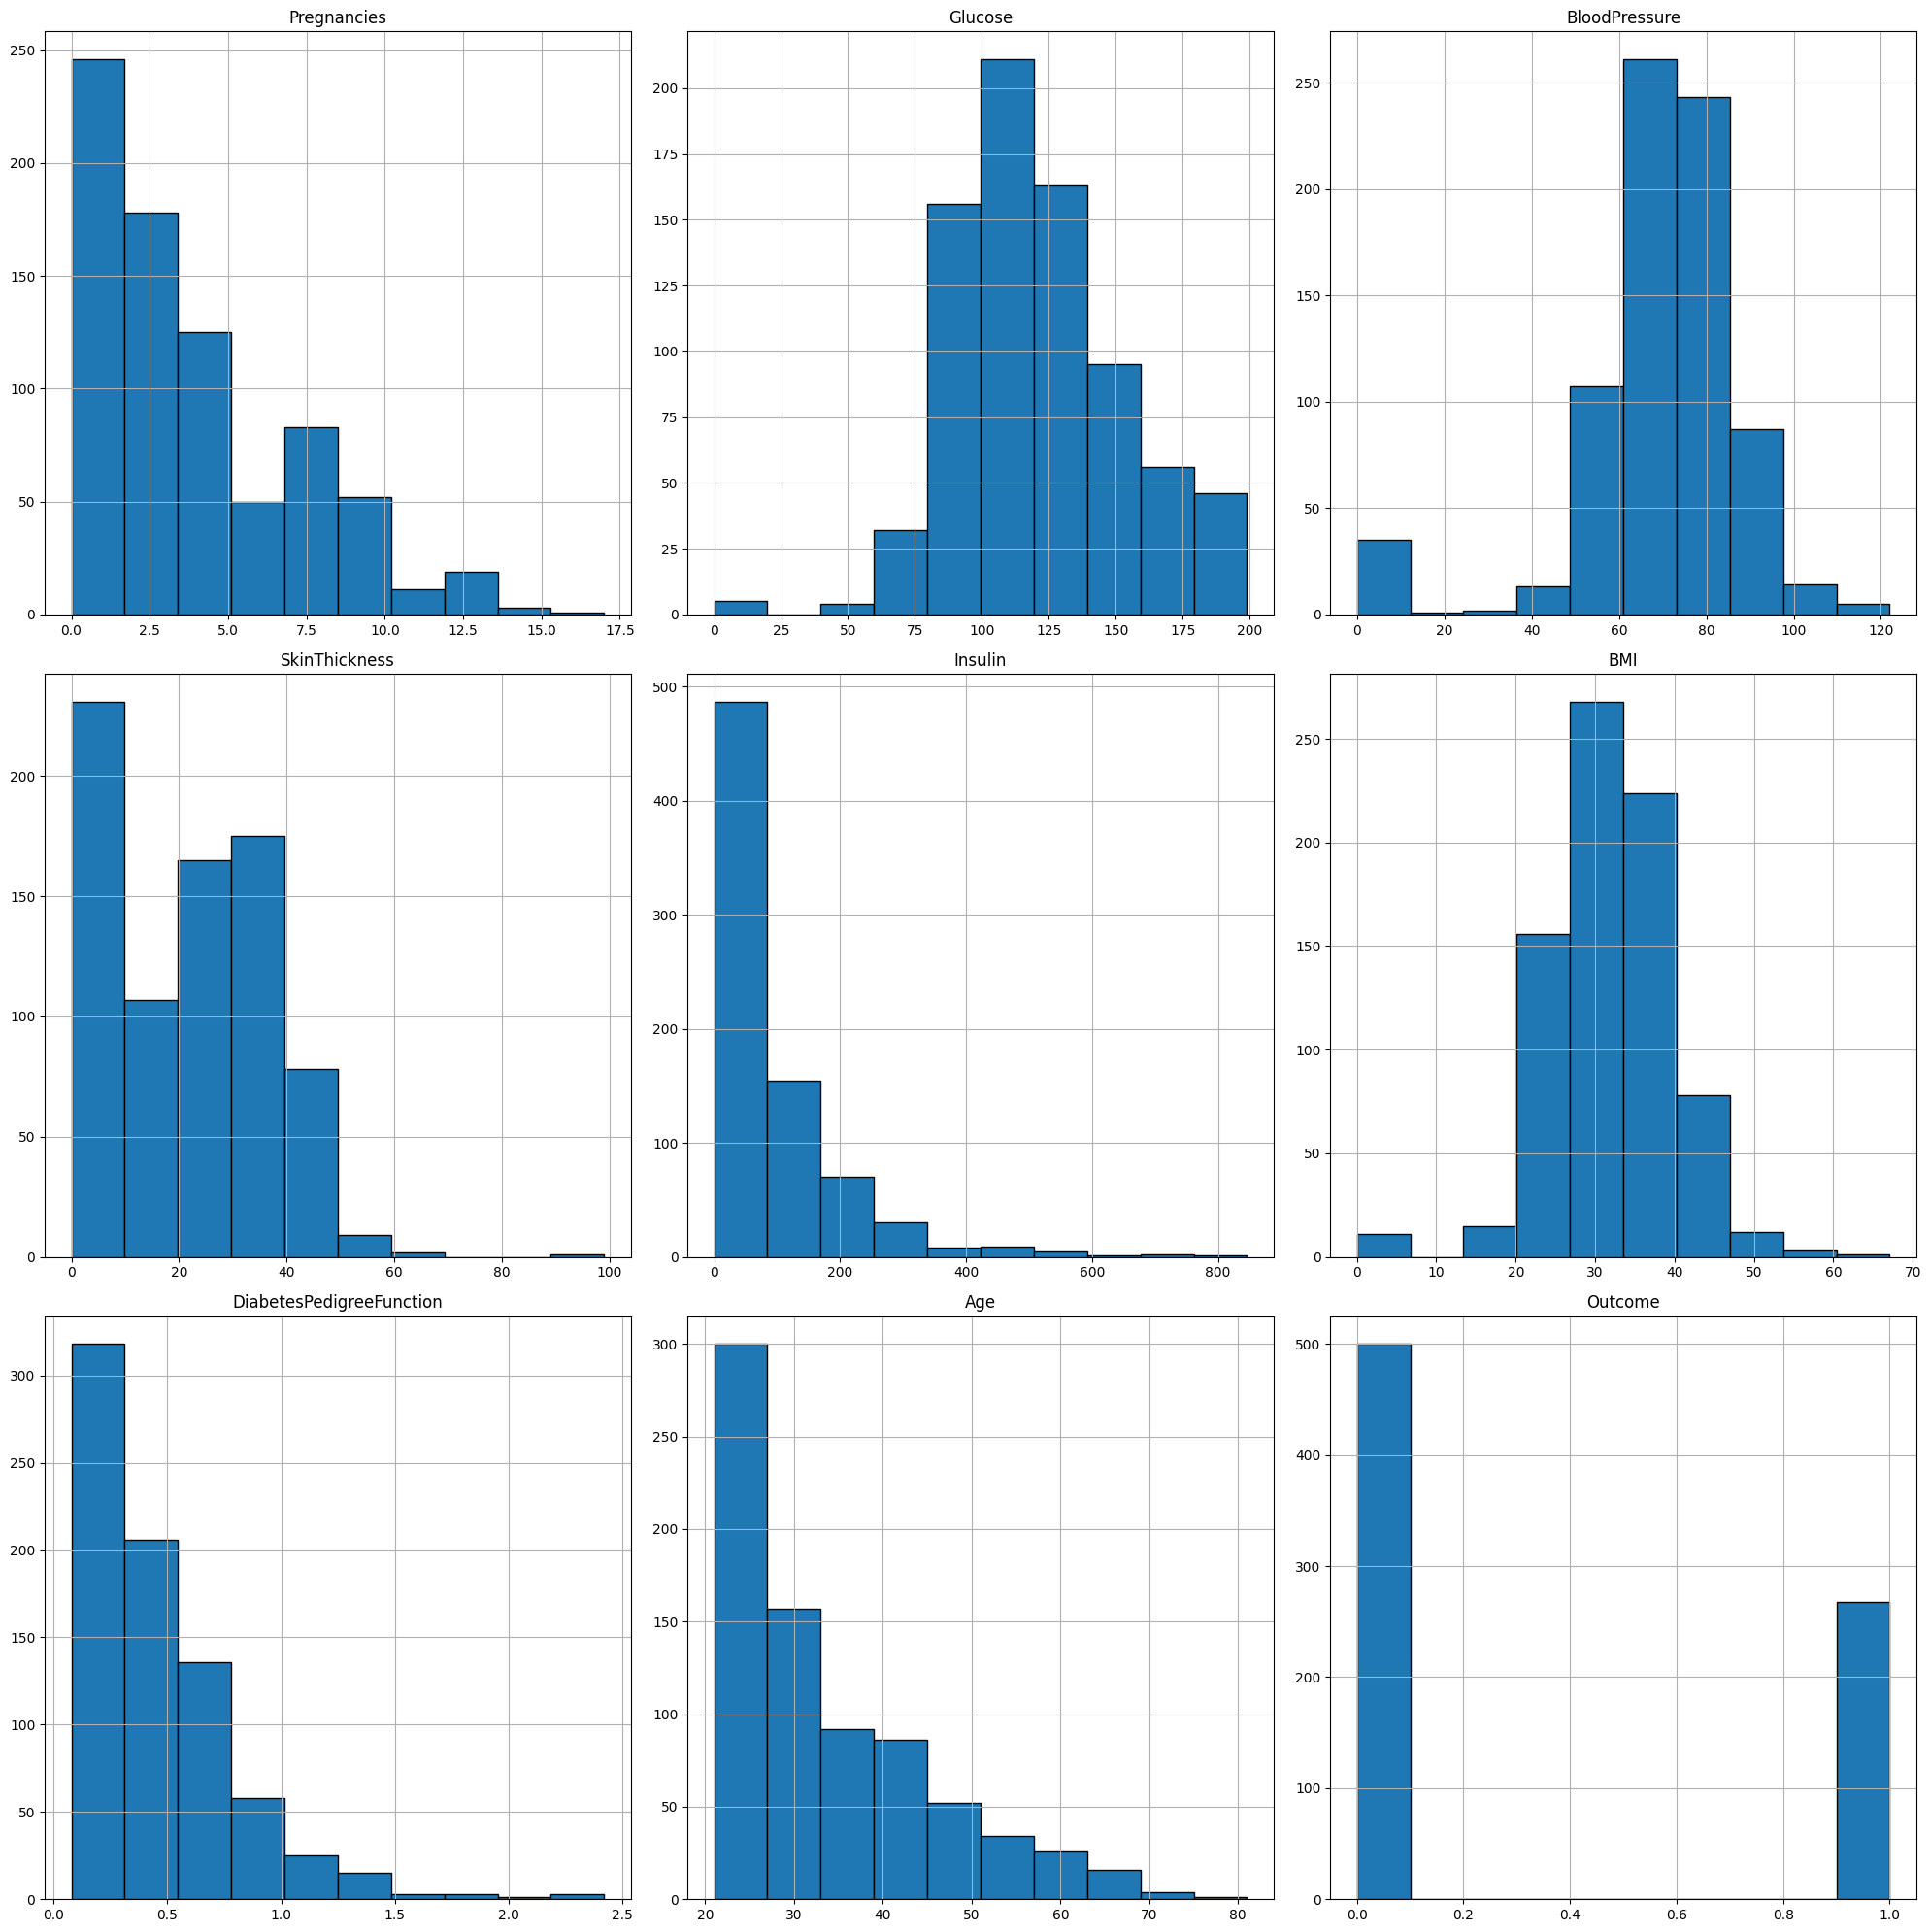

In [7]:
dataset.hist(figsize=(20, 20), edgecolor='black')

plt.tight_layout()
plt.show()

By analyzing these histograms,
*   NA values of 'Glucose' and 'BloodPressure' will be imputed with the **mean** of their respective columns because their distributions follow a normal distribution (bell curve).
*   NA values of 'SkinThickness', 'Insulin', and 'BMI' will be imputed with the **median** of their respective columns because their distributions are skewed, having long tails on either the right or left side.




In [8]:
dataset_copy['Glucose'] = dataset_copy['Glucose'].fillna(dataset_copy['Glucose'].mean())
dataset_copy['BloodPressure'] = dataset_copy['BloodPressure'].fillna(dataset_copy['BloodPressure'].mean())
dataset_copy['SkinThickness'] = dataset_copy['SkinThickness'].fillna(dataset_copy['SkinThickness'].median())
dataset_copy['Insulin'] = dataset_copy['Insulin'].fillna(dataset_copy['Insulin'].median())
dataset_copy['BMI'] = dataset_copy['BMI'].fillna(dataset_copy['BMI'].median())

Plot the histogram again to check the distribution

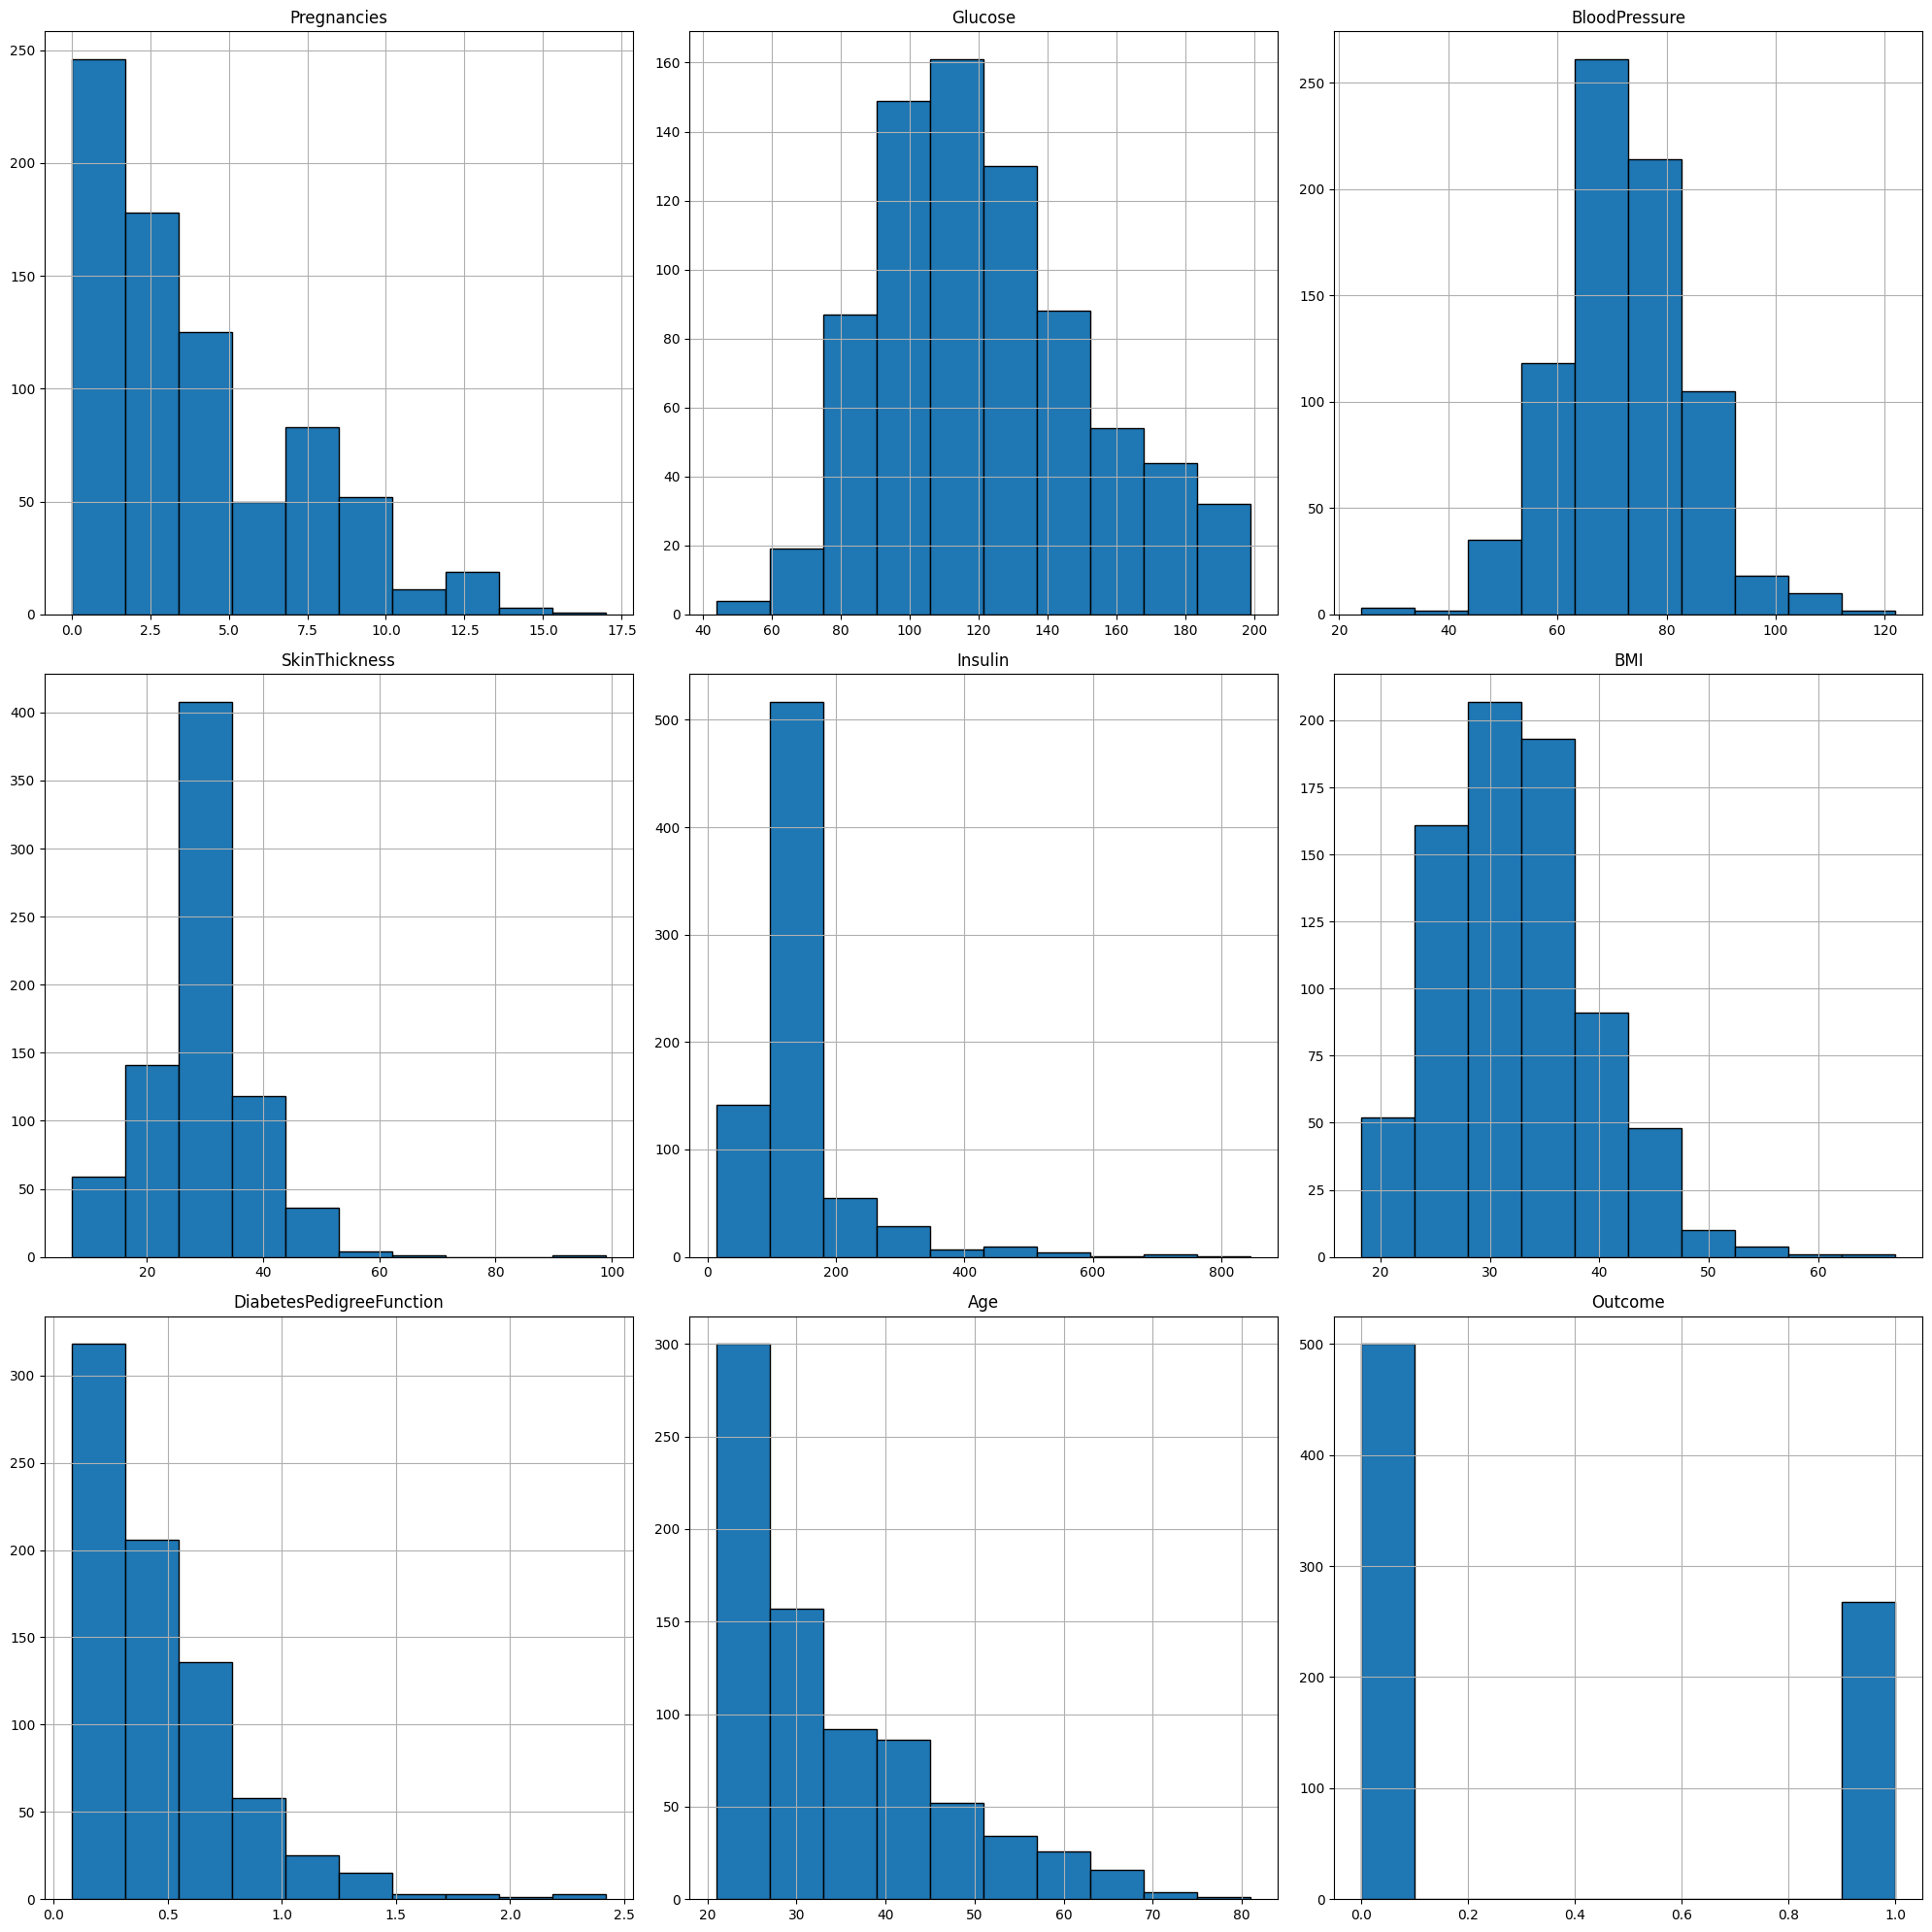

In [ ]:
dataset_copy.hist(figsize=(20, 20), edgecolor='black')

plt.tight_layout()
plt.show()

In [9]:
dataset_copy.groupby('Outcome').size()

,0
Outcome,
0,500
1,268


### 2) Visualization

In [ ]:
plt.figure()
sns.pairplot(dataset_copy, hue = 'Outcome')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

<Figure size 640x480 with 0 Axes>

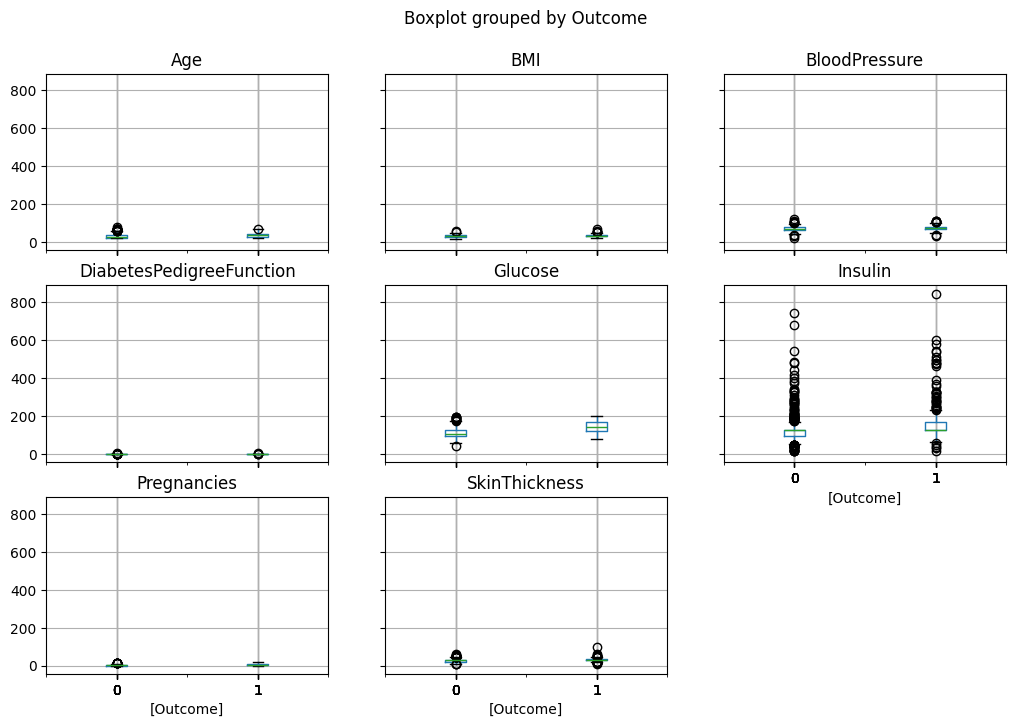

In [ ]:
plt.figure()
dataset_copy.boxplot(by="Outcome", figsize=(12,8))
plt.show()

### 3) Normalize the data - standard scale

In [10]:
from sklearn.preprocessing import StandardScaler

Normalize all numerical values using the Standard Scaler (which follows N(0,1))

In [11]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(dataset_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [12]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [13]:
y = dataset_copy['Outcome']

### 4) Spilt dataset into train set and test set

In [14]:
from sklearn.model_selection import train_test_split


Split the dataset with a train-to-test ratio of 8:2.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

In [16]:
X_train.shape

(614, 8)

In [17]:
y_train.shape

(614,)

In [18]:
X_test.shape

(154, 8)

In [19]:
y_test.shape

(154,)

## 2) Using KNN for classification

### 0) Import libraries

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve

### 1) Tuning to find the optimal k

In [21]:
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

In [22]:
max_train_accuracy = max(train_accuracy)
best_k_train = [k for i, k in enumerate(neighbors) if train_accuracy[i] == max_train_accuracy]

max_test_accuracy = max(test_accuracy)
best_k_test = [k for i, k in enumerate(neighbors) if test_accuracy[i] == max_test_accuracy]

print("Max train accuracy: {:.2f}% at k = {}".format(max_train_accuracy * 100, best_k_train))
print("Max test accuracy: {:.2f}% at k = {}".format(max_test_accuracy * 100, best_k_test))

Max train accuracy: 100.00% at k = [1]
Max test accuracy: 76.62% at k = [14]


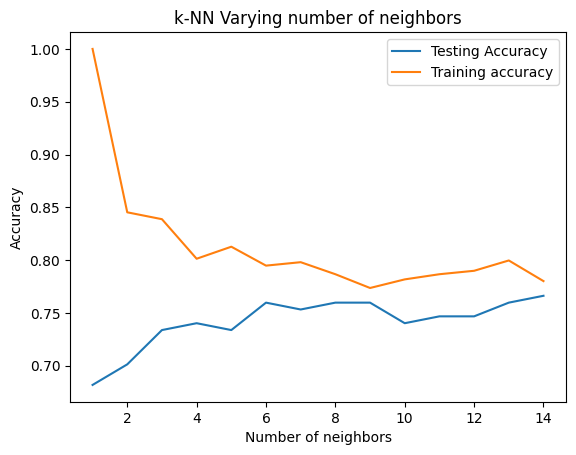

In [23]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### 2) Build the model

From the result of the previous part, choose `k = 14` to built the model

In [24]:
knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

### 3) Prediction

In [25]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

## 3) Performance evaluation

### 1) Build confusion matrix

In [26]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,90,10,100
1,26,28,54
All,116,38,154


Text(0.5, 23.52222222222222, 'Predicted label')

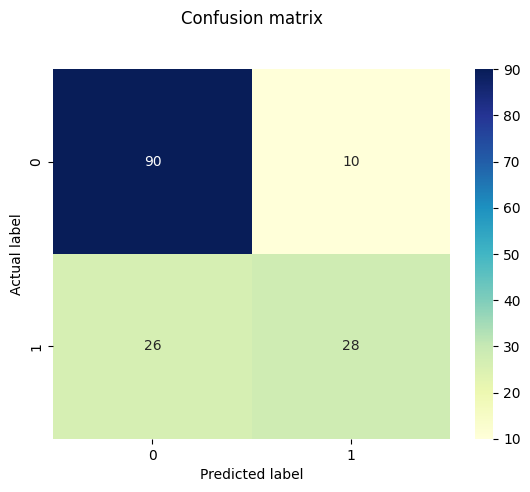

In [27]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 2) Accuracy

In [28]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 76.62 %.
